<a href="https://colab.research.google.com/github/sowlamineatifmsde/lamine/blob/main/fbprophet_pfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pystan==2.19.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 140 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639126 sha256=362d72de6911569d53547e92d9f14f535fb64d38c3118e6c54221a36e042345f
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
%matplotlib inline

In [ ]:
from google.colab import files
upload = files.upload()





Saving df.csv to df.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(upload['df.csv']),delimiter=";")
df['SOLDEM']=df['ENC']-df['DEC']
df.drop('SOLDE',axis=1,inplace=True)
df['SOLDE']=np.cumsum(df['SOLDEM'])
df.drop('SOLDEM',axis=1,inplace=True)
df.drop('ENC',axis=1,inplace=True)
df.drop('solscale',axis=1,inplace=True)
df.drop('annee',axis=1,inplace=True)
df.drop('masse',axis=1,inplace=True)
df.drop('RN',axis=1,inplace=True)
df.drop('CA',axis=1,inplace=True)
df.drop('DEC',axis=1,inplace=True)
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.set_index('Date',drop=True,inplace=True)
df.head()

,SOLDE
Date,
2009-12-31,-1852247.00
2010-01-01,-1830747.00
2010-01-02,-1830747.00
2010-01-03,-1830747.00
2010-01-04,-1291871.05


In [ ]:
df['SOLDE']=df['SOLDE']/1000

In [ ]:
df_model= df.reset_index().rename(columns={'Date':'ds', 'SOLDE':'y'})
df_model

,ds,y
0,2009-12-31,-1852247.00
1,2010-01-01,-1830747.00
2,2010-01-02,-1830747.00
3,2010-01-03,-1830747.00
4,2010-01-04,-1291871.05
...,...,...
4379,2021-12-27,-22907527.03
4380,2021-12-28,-23289815.56
4381,2021-12-29,-23562746.01
4382,2021-12-30,-24299047.11


In [ ]:
print('Starting date of the data: ', df_model.ds.min())
print('Ending date of the data: ', df_model.ds.max())
print('Total number of days in available historical data: ', df_model.ds.nunique())


Starting date of the data:  2009-12-31 00:00:00
Ending date of the data:  2021-12-31 00:00:00
Total number of days in available historical data:  4384


In [11]:
# Création du modèle prophet
prophet_model = Prophet(interval_width=0.95,daily_seasonality=True)
prophet_model.fit(df_model)

In [12]:
period_in_days = 100 # Heure * Nb de jours
future = prophet_model.make_future_dataframe(periods=period_in_days, freq='D')

In [13]:
future

,ds
0,2009-12-31
1,2010-01-01
2,2010-01-02
3,2010-01-03
4,2010-01-04
...,...
4479,2022-04-06
4480,2022-04-07
4481,2022-04-08
4482,2022-04-09


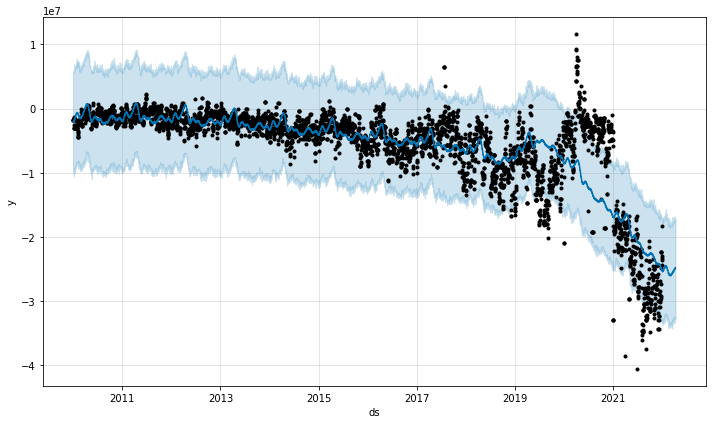

In [16]:
forecast = prophet_model.predict(df=future)
fig1=prophet_model.plot(forecast)

In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4479,2022-04-06,-2.709160e+07,-3.335766e+07,-1.716432e+07,-2.733119e+07,-2.681367e+07,2.043975e+06,2.043975e+06,2.043975e+06,333632.271605,...,-139365.011597,-139365.011597,-139365.011597,1.849708e+06,1.849708e+06,1.849708e+06,0.0,0.0,0.0,-2.504763e+07
4480,2022-04-07,-2.711456e+07,-3.280391e+07,-1.744166e+07,-2.736086e+07,-2.683066e+07,2.244695e+06,2.244695e+06,2.244695e+06,333632.271605,...,11929.856390,11929.856390,11929.856390,1.899133e+06,1.899133e+06,1.899133e+06,0.0,0.0,0.0,-2.486986e+07
4481,2022-04-08,-2.713752e+07,-3.242434e+07,-1.754275e+07,-2.739037e+07,-2.684766e+07,2.339304e+06,2.339304e+06,2.339304e+06,333632.271605,...,61307.841251,61307.841251,61307.841251,1.944364e+06,1.944364e+06,1.944364e+06,0.0,0.0,0.0,-2.479821e+07
4482,2022-04-09,-2.716047e+07,-3.276060e+07,-1.713912e+07,-2.741974e+07,-2.686465e+07,2.370897e+06,2.370897e+06,2.370897e+06,333632.271605,...,52486.983324,52486.983324,52486.983324,1.984777e+06,1.984777e+06,1.984777e+06,0.0,0.0,0.0,-2.478958e+07
4483,2022-04-10,-2.718343e+07,-3.255483e+07,-1.716302e+07,-2.744599e+07,-2.688165e+07,2.410576e+06,2.410576e+06,2.410576e+06,333632.271605,...,57190.337104,57190.337104,57190.337104,2.019753e+06,2.019753e+06,2.019753e+06,0.0,0.0,0.0,-2.477285e+07


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds          yhat    yhat_lower    yhat_upper
0    2009-12-31  -2102.286291  -7374.459716   3056.728771
1    2010-01-01  -2060.479431  -6848.147335   3280.679642
2    2010-01-02  -2069.889409  -7260.824863   3074.083666
3    2010-01-03  -2058.263859  -7143.387850   2596.438720
4    2010-01-04  -2058.973445  -7143.963821   3055.695919
...         ...           ...           ...           ...
4385 2022-02-28 -25971.798855 -30904.544613 -20898.729518
4386 2022-03-31 -25206.634208 -30136.452000 -20317.193670
4387 2022-04-30 -26318.148578 -31457.291816 -20887.342907
4388 2022-05-31 -28477.317969 -33622.405920 -23725.834360
4389 2022-06-30 -29182.162477 -34244.748160 -24177.545273

[4390 rows x 4 columns]


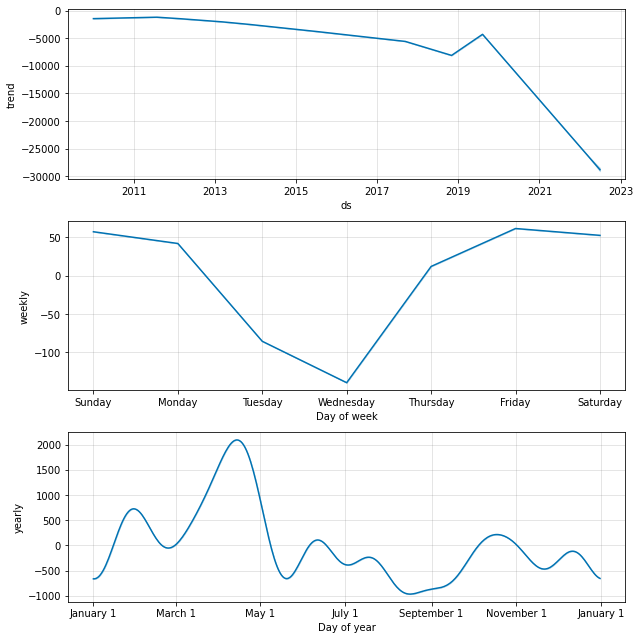

In [ ]:
fig2 = prophet_model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(prophet_model, forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_model, initial='366 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 133 forecasts with cutoffs between 2011-01-28 00:00:00 and 2021-12-01 00:00:00


  0%|          | 0/133 [00:00<?, ?it/s]

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-02-28,-812.920360,-1669.372488,69.238434,-1217.54181,2011-02-27
1,2011-03-01,-715.743824,-1525.911935,119.296704,-2165.69854,2011-02-27
2,2011-03-02,-507.657944,-1325.663294,381.367158,-2238.11530,2011-02-27
3,2011-03-03,-452.797585,-1286.641193,386.682547,-2781.02978,2011-02-27
4,2011-03-04,-446.326935,-1283.109143,385.824520,-2748.06566,2011-02-27
...,...,...,...,...,...,...
3955,2021-12-27,-21466.256276,-26356.053462,-16181.934555,-22907.52703,2021-10-02
3956,2021-12-28,-21663.746035,-27064.651458,-16381.032513,-23289.81556,2021-10-02
3957,2021-12-29,-21793.525425,-27004.732951,-16389.655844,-23562.74601,2021-10-02
3958,2021-12-30,-21714.416303,-27168.834597,-16359.973280,-24299.04711,2021-10-02


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



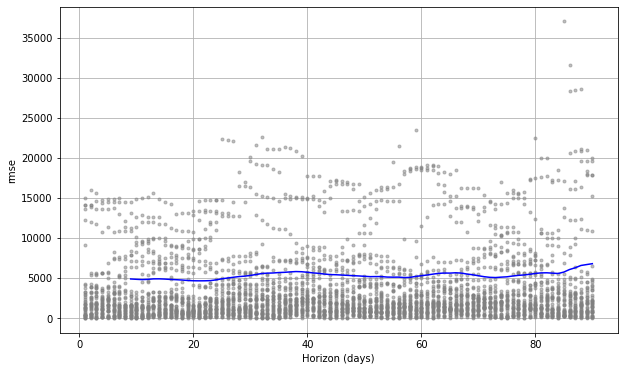

In [ ]:
df_p = performance_metrics(df_cv)
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
77,86 days,3.659888e+07,6049.700420,3632.977844,3.645840,0.461145,0.444444
78,87 days,3.929852e+07,6268.853287,3678.614637,3.693263,0.440409,0.449495
79,88 days,4.295760e+07,6554.204778,3749.249536,2.928829,0.438205,0.452020
80,89 days,4.445813e+07,6667.692877,3762.605362,2.914762,0.450331,0.472222
81,90 days,4.593600e+07,6777.610053,3803.306015,2.911699,0.494202,0.474747


In [ ]:
df_cv['moyenne_prevision']=(df_cv['yhat']+df_cv['yhat_lower']+df_cv['yhat_upper'])/3

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,moyenne_prevision
0,2011-02-28,-812.920360,-1669.372488,69.238434,-1217.54181,2011-02-27,-804.351471
1,2011-03-01,-715.743824,-1525.911935,119.296704,-2165.69854,2011-02-27,-707.453019
2,2011-03-02,-507.657944,-1325.663294,381.367158,-2238.11530,2011-02-27,-483.984694
3,2011-03-03,-452.797585,-1286.641193,386.682547,-2781.02978,2011-02-27,-450.918744
4,2011-03-04,-446.326935,-1283.109143,385.824520,-2748.06566,2011-02-27,-447.870519
...,...,...,...,...,...,...,...
3955,2021-12-27,-21466.256276,-26356.053462,-16181.934555,-22907.52703,2021-10-02,-21334.748098
3956,2021-12-28,-21663.746035,-27064.651458,-16381.032513,-23289.81556,2021-10-02,-21703.143335
3957,2021-12-29,-21793.525425,-27004.732951,-16389.655844,-23562.74601,2021-10-02,-21729.304740
3958,2021-12-30,-21714.416303,-27168.834597,-16359.973280,-24299.04711,2021-10-02,-21747.741393


# Nouvelle section

# Nouvelle section

In [ ]:
#from pycaret.utils import *
#version()

In [ ]:
#from pycaret.time_series import *

In [ ]:
#data.dtypes

In [ ]:
#s=setup(data=data,index='Date',target="SOLDE",fold= 3,fh=12,session_id=123)

In [ ]:
df['C'].fillna(0, inplace=True)
df['D'].fillna(0, inplace=True)

In [ ]:
df['solde']=df['C']-df['D']

In [ ]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [ ]:
df['total']= np.cumsum(df['solde'])

In [ ]:
df

,COMPTE,nom du compte,DATE,JRNAL,REF,LIBELLE,D,C,solde,total
0,50000000,NaN,39814,NaN,NaN,SOLDE DE DEPART,1800000.00,0.00,-1800000.00,-1.800000e+06
1,34880000,NaN,2010-01-01 00:00:00,ATWB,ANUL CHEQ,BAM .ANNUL CHEQ N°66582 DU 17/11/09,0.00,21500.00,21500.00,-1.778500e+06
2,51411000,NaN,2010-01-01 00:00:00,ATWB,ANUL CHEQ,BAM .ANNUL CHEQ N°66582 DU 17/11/09,21500.00,0.00,-21500.00,-1.800000e+06
3,34211000,NaN,2010-01-04 00:00:00,ATWB,1219,S N T L,0.00,821649.33,821649.33,-9.783507e+05
4,34310100,NaN,2010-01-04 00:00:00,SGMB,VIR,BMCE/BOUKRIS NADIA,2000.00,0.00,-2000.00,-9.803507e+05
...,...,...,...,...,...,...,...,...,...,...
236519,61671000,droits d'enregistrement & de t,2021-12-31 00:00:00,BA,NaN,OPER. DEBIT REF :TIMFISC,10.00,0.00,-10.00,-5.387811e+08
236520,63115000,Int.bancaires/opérat°inancemen,2021-12-31 00:00:00,B4,NaN,INTERET DEBI 4 TRIM21,117.42,0.00,-117.42,-5.387812e+08
236521,63115000,Int.bancaires/opérat°inancemen,2021-12-31 00:00:00,B2,NaN,FRAIS TENU COMPTE 4 TRIM 21,79.25,0.00,-79.25,-5.387813e+08
236522,63115000,Int.bancaires/opérat°inancemen,2021-12-31 00:00:00,B1,NaN,AGIOS AU,479.05,0.00,-479.05,-5.387818e+08


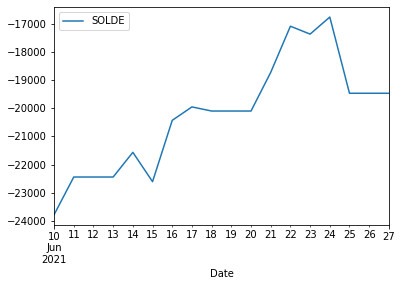

In [ ]:
df[4179:4197].plot()

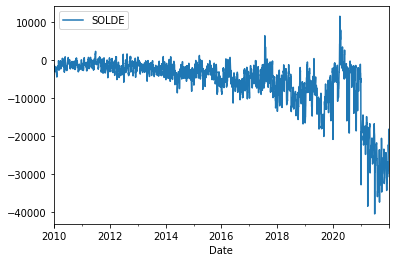

In [ ]:
df.plot()

In [ ]:
df_cv['ds']<="01/01/2011"

0       False
1       False
2       False
3       False
4       False
        ...  
3955    False
3956    False
3957    False
3958    False
3959    False
Name: ds, Length: 3960, dtype: bool

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,moyenne_prevision
0,2011-02-28,-812.920360,-1669.372488,69.238434,-1217.54181,2011-02-27,-804.351471
1,2011-03-01,-715.743824,-1525.911935,119.296704,-2165.69854,2011-02-27,-707.453019
2,2011-03-02,-507.657944,-1325.663294,381.367158,-2238.11530,2011-02-27,-483.984694
3,2011-03-03,-452.797585,-1286.641193,386.682547,-2781.02978,2011-02-27,-450.918744
4,2011-03-04,-446.326935,-1283.109143,385.824520,-2748.06566,2011-02-27,-447.870519
...,...,...,...,...,...,...,...
3955,2021-12-27,-21466.256276,-26356.053462,-16181.934555,-22907.52703,2021-10-02,-21334.748098
3956,2021-12-28,-21663.746035,-27064.651458,-16381.032513,-23289.81556,2021-10-02,-21703.143335
3957,2021-12-29,-21793.525425,-27004.732951,-16389.655844,-23562.74601,2021-10-02,-21729.304740
3958,2021-12-30,-21714.416303,-27168.834597,-16359.973280,-24299.04711,2021-10-02,-21747.741393
